# Regresión lineal
NOTA: Antes de iniciar, descarga el dataset de kaggle ["House Prices - Advanced Regression Techniques"](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) y coloca los archivos "train.csv" y "test.csv" en la carpeta "data".

En este ejercicio implementarás la solución analítica de regresión lineal. Además, investigarás la influencia de los puntos extremos en el modelo. Antes de empezar importaremos las librerias necesarias. Después, leeremos el archivo que contiene los datos de entrenamiento.

**(TODO) Describe la diferencia entre regresión y clasificación en una oración**

Regresión: Predice un número.

Clasificación: Predice una categoría.

## Ejercicio:
En la siguiente parte queremos implementar la solución de mínimos cuadrados para regresión lineal. Esto significa que dado un set de puntos $\{\mathbf{x_i},y_i\}$, $i = 1, 2, ..., M$ queremos encontrar la línea (o hiperplano en múltiples dimensiones) que minimice el error cuadrático. Este tipo de error, mide la distancia entre los puntos predichos por el modelo lineal contra los valores reales.

La fórmula general de regresión lineal es $\mathbf{y} = \mathbf X \boldsymbol w+ \mathbf{\epsilon}$ donde:

- $\epsilon$ es un vector de dimensionalidad $\mathbb{R}^M$ conteniendo los términos de error $N(0,\sigma^2)$
- $\mathbf{y}$ es el vector de etiquedas
- $\mathbf{X}$ es la *matriz* de data points de dimensionalidad $\mathbb{R}^{M \times D}$. 

Nos interesa calcular los pesos $\hat{\boldsymbol w}$ que definan la función lineal óptima. Como vimos en clase, estos estimados están dados por:

\begin{equation}
\hat{\boldsymbol w} = (\mathbf{X}^{\rm T}\mathbf{X})^{-1} \mathbf{X}^{\rm T}\mathbf{y}
\end{equation}

**Tu trabajo**
1. En el primer ejercicio, generaremos un ruido gausiano de dos dimensiones alrededor de una función lineal. Observa como se general los datos y cuáles son los parámetros reales de $\boldsymbol{w}$.
2. Implementarás la solución analítica de regresión lineal. Para ello debes realizar los siguientes pasos.
    1. Modifica la matriz de datos para que se encuentre en la forma de notación aumentada.
    2. Calcula los pesos estimados según la fórmula vista en clase, usando las funciones de numpy y python.
    3. Visualiza la línea resultante (el modelo) en la misma gráfica que de los datos originales.
    3. Calcula la suma de errores residuales de los data points y estima un promedio i.e. $\sum_{i=1}^M \|y(x_i) - y_i \|^2$.
    5. Compara tus resultados con la función integrada de numpy `np.linalg.lstsq(...)`
3. Finalmente, repite los pasos anteriores para generar un modelo de regresión lineal que resuelva del problema de las casas.

## 1. "Toy problem"

In [13]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Generamos datos aleatorios con una desviación estandar conocida
## Alrededor de una funcion lineal conocida y = 1.2x + 0.7
n_muestras = 100
ruido_blanco_std = 2
X = np.random.randn(n_muestras, 1)
eps = np.random.randn(n_muestras, 1) * ruido_blanco_std
w = np.array([[5, 1.2]]).T
y = w[0] + X * w[1] + eps

## Imprimimos la dimensionalidad de nuestros datos de entrada y las etiquetas
print(X.shape)  # X es de n_muestras, 1 (variable)
print(y.shape)
print(w.shape)

## Graficar los datos
plt.scatter(X, y)
plt.grid()

ModuleNotFoundError: No module named 'matplotlib'

## 2. Solución a regresión lineal

In [ ]:
# 2.1. TODO: Transforma los datapoints X a notación aumentada
# Tips: 
#   - Imprime la forma/dimensionalidad de la matriz con print(X.shape) y verifica que sea del tamaño adecuado
#   - Investiga la función de numpy np.concatenate y np.ones
ones = np.ones((n_muestras,1))
print(ones.shape)
print(X.shape)
X_augmented = np.concatenate((ones, X), axis=-1)
print(X_augmented.shape)

(100, 1)
(100, 1)
(100, 2)


In [ ]:
# 2.2 TODO: usa la ecuación anterior (X'X)^(-1)X'Y para calcular los pesos
# Consejo: 
#       Utiliza np.dot() o @ para calcular la multiplicación de matrices
#       np.linalg.inv() se usa para calcular la matriz inversa
#       X.T es la transpuesta de X

w_hat = np.linalg.inv(X_augmented.T @ X_augmented) @ X_augmented.T @ y
print(w_hat.shape)

(2, 1)


(100, 1)


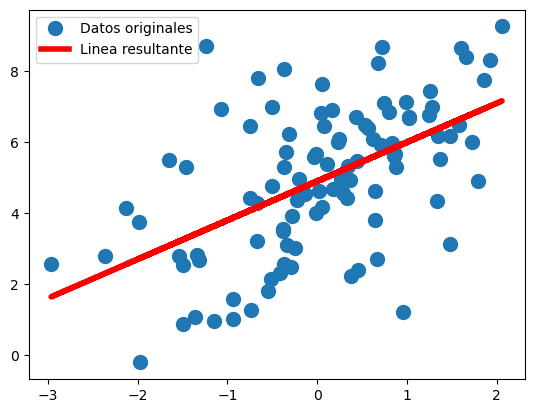

In [ ]:
# 2.3 TODO: Calcula las predicciones de tu modelo
y_hat = X_augmented @ w_hat
print(y_hat.shape)

plt.plot(X, y, 'o', label='Datos originales', markersize=10)

# TODO: Grafica las preddicciones/ la linea resultante
plt.plot(X, y_hat, 'r', lw=4, label='Linea resultante')

plt.legend()

In [ ]:
error = y - y_hat
print(error.shape)
print(error[:3])
e_2 = error ** 2
print(e_2[:3])
print(np.sum(error**2))
print(np.linalg.norm(error) **2)


(100, 1)
[[-2.80949282]
 [ 0.16496308]
 [-0.95182816]]
[[7.89324989]
 [0.02721282]
 [0.90597684]]
313.6953421794154
313.6953421794153


C:\Users\mvb17\AppData\Local\Temp\ipykernel_29224\338256423.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c, m = np.linalg.lstsq(X_augmented,y)[0]


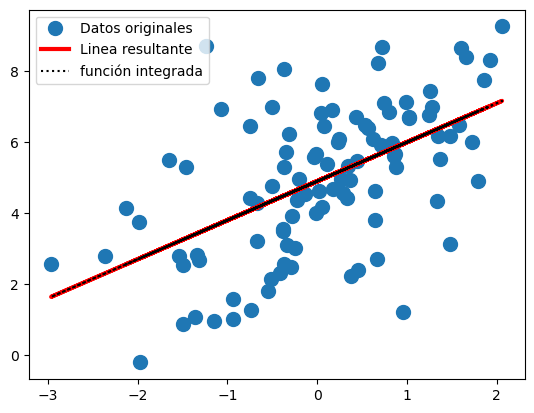

Residuales mios:  313.6953421794154
Residuales numpy: 313.69534217941543


In [ ]:
## 2.4 TODO: Calcula la suma de errores cuadrádos
error = y - y_hat
residual_mio = np.sum(error**2)


## 2.5 TODO: Compara los resultados con la función integrada de numpy 'np.linalg.lstsq'
c, m = np.linalg.lstsq(X_augmented,y)[0]
y_hat2 = m*X + c
error2 = y - y_hat2
residual_numpy = np.sum(error2**2)

# Graficando
plt.plot(X, y, 'o', label='Datos originales', markersize=10)

# TODO: Grafica la linea resultante de TU modelo como en la sección anterior
plt.plot(X, y_hat, 'r', lw=3, label='Linea resultante')

# TODO: Grafica la linea resultante de numpy como en la sección anterior
plt.plot(X, y_hat2, ':k', label='función integrada')
plt.legend()
plt.show()

# TODO: Imprime y compara la suma de errores cuadrádos calculado por TU metodo y el de numpy
print("Residuales mios: ", residual_mio)
print("Residuales numpy:", residual_numpy)

## 3. El efecto de los outliers

En esta sección analizaremos los datos del problema de las casas para buscar una solución a través de regresión lineal.

Para ello observaremos los datos y aplicaremos un modelo de regresión lineal a los mismos. Después realizarás los mismo pasos en un conjunto con datos filtrados a fin de encontrar un mejor modelo.

Tu trabajo:
1. Utiliza la librería de scikit-learn para encontrar la solución de regresión lineal para el problema de las casas usando el **conjunto de datos de entrenamiento (train_data)**
2. Calcula el error cuadrático en el **conjunto de validación (val_data)**.
3. Repite los dos pasos anteriores para los datos filtrados y observa la diferencia.

In [ ]:
# Importar librerias
import pandas as pd
import numpy as np
import os

In [ ]:
def read_data(data_dir, file):
    df = pd.read_csv(os.path.join(data_dir, file))
    return df

# Leer los datasets
data_dir = "./data"
data = read_data(data_dir, "train.csv")

# Filtrar los datos para seleccionar las columnas de interes
# y dejar solo los datos del 2010
selected_dim = ["LotArea", "SalePrice"]
data = data[data["YrSold"] <= 2009]
data = data[selected_dim]

# Separamos los datos en diferentes conjuntos
n_datapoints = len(data)
train_data = data[:-n_datapoints//4]
val_data = data[-n_datapoints//4:]

NameError: name 'pd' is not defined

## Visualización
En la siguiente celda visualizamos los datos originales. Observa como contine una distribución densa para cases con un area menor a 50k sqft y un precio menor a 600k USD, y por otro lado contiene datos escasos fuera de estos rangos.

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_data(x, labels):
    x_label = "Área (sqft)"
    y_label = "Precio (USD)"
    fig, ax = plt.subplots(figsize=(4,4))
    ax.scatter(x, labels, edgecolors='black') # x, y
    ax.set_ylabel(y_label, fontweight='bold')
    ax.set_xlabel(x_label, fontweight='bold')
    ax.grid(linestyle='--')
    return fig, ax

# Definir variables y etiquetas
X = np.array(train_data["LotArea"])
y = np.array(train_data["SalePrice"])

# Visualizar los datos originales
fig, ax = plot_data(X, y)
fig.tight_layout()
plt.show()

NameError: name 'np' is not defined

### Regresión en datos originales

Primero aplicaremos regresión lineal a los datos íntegros para observar el efecto de conservar los datos extremos en el entrenamiento del modelo.

Puedes consultar la documentación de sci-kit learn para  [regresión lineal](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) en línea para obtener detalles de como utilizar la función.

In [3]:
from sklearn.linear_model import LinearRegression
X = X.reshape(-1, 1)

# TODO: Usas la funcion integrada de scikit learn para encontrar un modelo de regresión lineal que se ajuste a los datos de entrenamiento y obtén las predicciones
model = LinearRegression()
model.fit(X,y)
preds = model.predict(X) 

# Graficamos los datos originales
fig, ax = plot_data(X, y)
# TODO: Grafica la linea resultante sobre los datos originales
ax.plot(X, preds, 'y')

plt.legend()

# TODO: calcula el error cuadrado promedio
mean_error = np.mean((y-preds)**2)
print(mean_error)

NameError: name 'X' is not defined

## Pre-procesamiento de datos
Como observamos, estos datos presentan múltiples valores aislados lo que afecta la solución de regresión lineal. 

En la siguiente sección, remueve los valores aislados y repite los pasos anteriores para encontrar un modelo de regresión lineal. C

Calcula el error cuadrático los datos filtrados. 

(TODO: Responde) ¿Cuál es el efecto de pre procesar los datos?

In [2]:
# TODO: Remueve los outliers seleccionando un valor que consideres apropiado (filtra los valores de LotArea <= 70000 y SalePrice <= 700000) hasta que los datos se encuentren densamente concentrados en una región
train_data_filtrada = train_data[train_data["LotArea"] <= 22000]
train_data_filtrada = train_data_filtrada[train_data["SalePrice"] <= 370000]

# Definir variables y etiquetas
X_filtered = np.array(train_data_filtrada["LotArea"])
y_filtered = np.array(train_data_filtrada["SalePrice"])

# Graficar de nuevo
fig, ax = plot_data(X_filtered, y_filtered)
fig.tight_layout()
plt.show()

NameError: name 'train_data' is not defined

### Regresión en datos filtrados

In [1]:
X_filtered = X_filtered.reshape(-1, 1)

# TODO: Utiliza la clase de LinearRegression de la librería de sci-kit learn para encontrar el modelo de regresión lineal para los datos.
model = LinearRegression()
model.fit(X_filtered, y_filtered)
preds = model.predict(X_filtered)

# TODO: Grafica la linea resultante sobre los datos originales (train_data)
fig, ax = plot_data(X_filtered, y_filtered)
ax.plot(X_filtered, preds, 'r')

# TODO: calcula el error cuadrado promedio
mean_error_new = np.mean((y_filtered-preds)**2)

# Visualiza como cambia el error cuando filtramos los datos
print(mean_error_new)
print("diferencia de error", mean_error - mean_error_new)

NameError: name 'X_filtered' is not defined

## TODO: Responde las siguientes preguntas

**¿Qué puedes concluir de este ejemplo?** 

No es posible que todos los datos presentes en cada modelo concuerden con su línea resultante. Siempre habrá un margen de error.


**¿Cuál de las dos soluciones es un mejor modelo de nuestros datos?**

Considera que la regresión en datos filtrados dio unos datos más precisos y equilibrados.


**¿Además de filtrar los datos, qué estrategias puedes tomar para penalizar más levemente a los valores aislados?**


